In [1]:
import pandas as pd
from src.graficar import graficar_serie 
from src.transformar import transformar
from src.ARIMA_experimento import ARIMA_experimento
from src.forecast import hacer_forecast

###  Descomposición de la serie ###
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
ruta_v1 = 'data/clean_data/v1.csv'
v1 = pd.read_csv(ruta_v1, index_col = 0)
print(v1.shape)
v1.tail()

(1000, 1)


,Valores
995,769.35
996,767.89
997,761.49
998,760.74
999,759.72


In [3]:
ruta_h1 = 'data/clean_data/h1.csv'
h1 = pd.read_csv(ruta_h1, index_col=0)
print(h1.shape)
h1.head()

(500, 1)


,Valores
1000,751.47
1001,752.97
1002,755.53
1003,759.23
1004,760.15


In [4]:
v1.info()
variable = 'Valores'
# 1500 datos limpios

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valores  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


shape: (1000, 1)


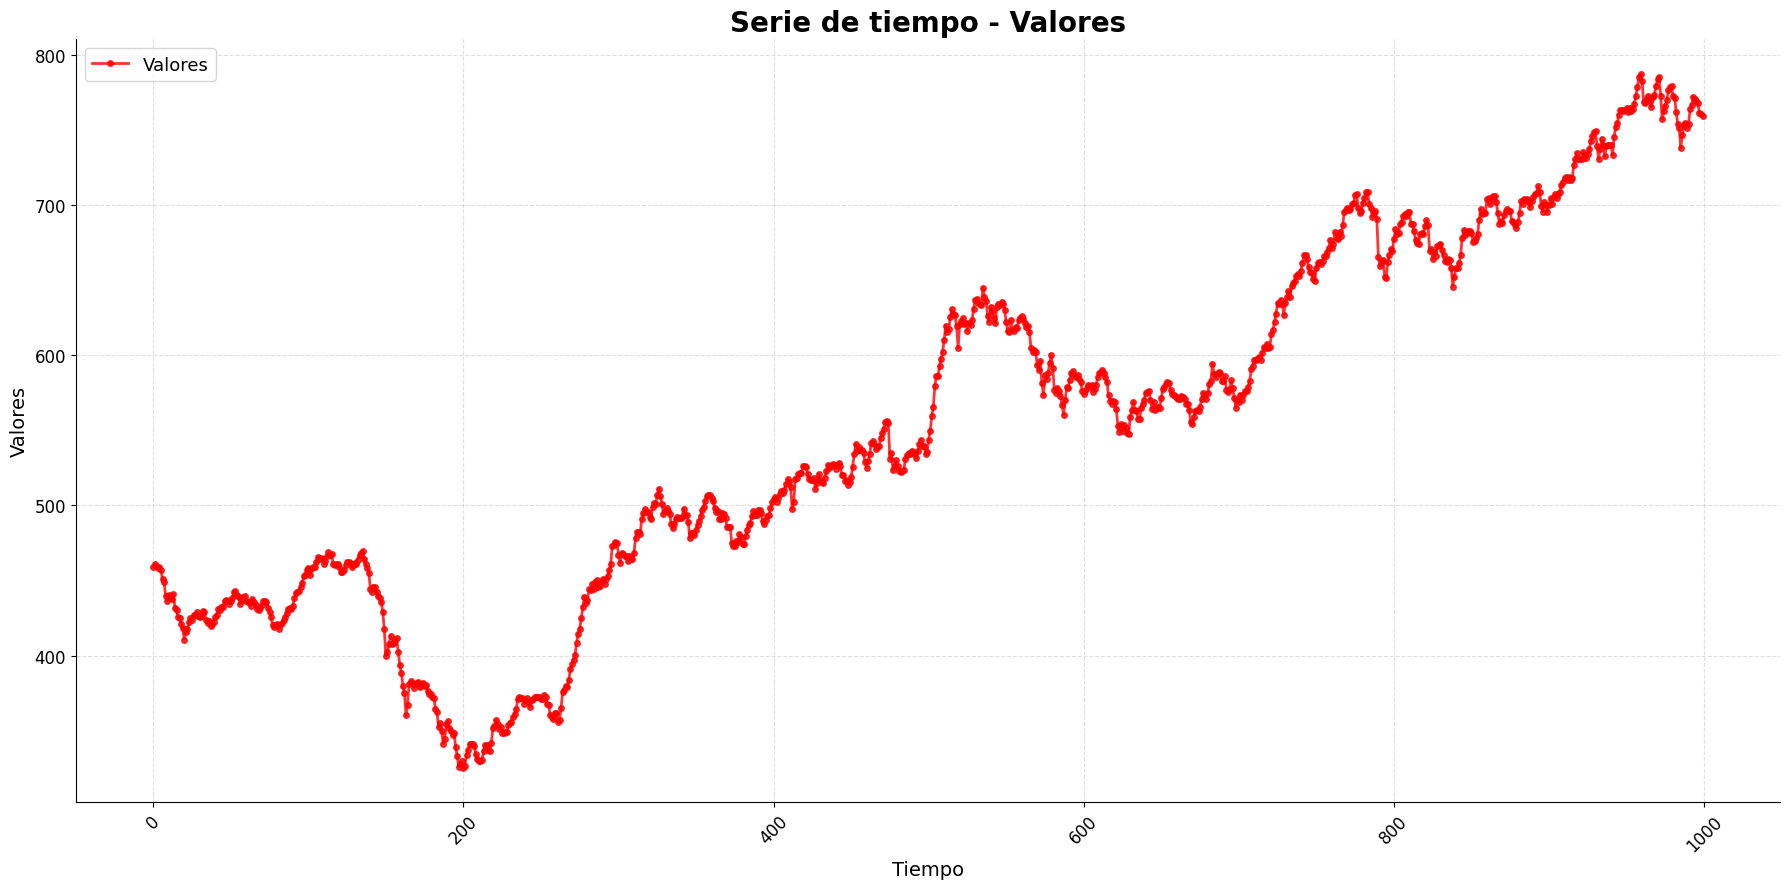

In [5]:
print(f'shape: {v1.shape}')
graficar_serie(v1, variable, color = 'red')
# Claramente podemos ver que antes de aplicar cualquier intento de ARIMA debemos procesar la serie para
# evitar que la no estacionalidad dificulte el aprendizaje de la estructura temporal para los modelos

### Transormar la serie

In [6]:
serie, scaler, media_diff, primer_valor = transformar(v1, variable)

### Experimento 1


 Modelo ARIMA(0,0,1) entrenado exitosamente

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1386.988
Date:                Wed, 29 Oct 2025   AIC                           2777.977
Time:                        12:27:51   BIC                           2787.788
Sample:                             0   HQIC                          2781.706
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2488      0.025      9.859      0.000       0.199       0.298
sigma2         0.9433      0.029     32.483      0.000       0.886       1.000
Ljung-

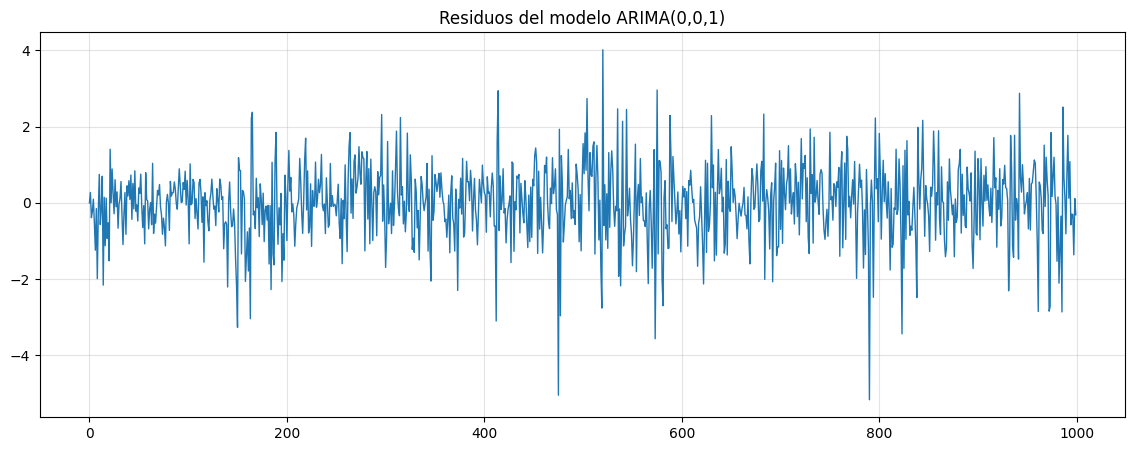

<Figure size 1400x400 with 0 Axes>

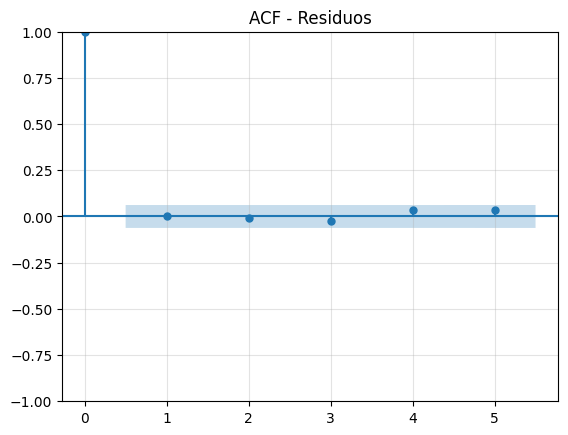

<Figure size 1400x400 with 0 Axes>

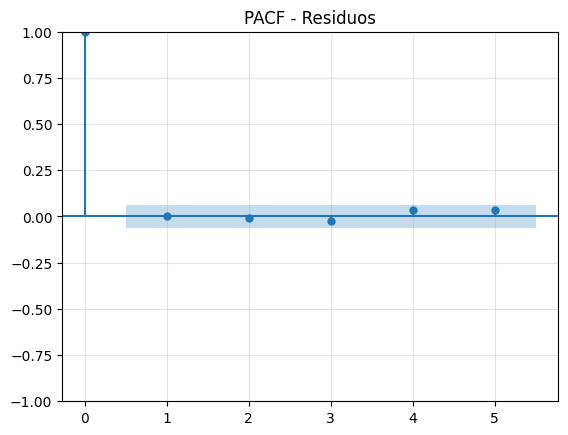


 Test de Ljung - Box ¿Es ruido blanco?

    lb_stat  lb_pvalue
1  0.000200   0.988712
2  0.044485   0.978003
3  0.683644   0.877044
4  2.057685   0.725150
5  3.451314   0.630767

 Interpretacion de la Hipótesis nula

Lag 1: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 2: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 3: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 4: No rechaza Ho -- Residuos se comportan como ruido blanco
Lag 5: No rechaza Ho -- Residuos se comportan como ruido blanco


In [7]:
serie = pd.Series(serie, index=v1.index)
p = 0
d = 0
q = 1
resultado, residuos = ARIMA_experimento(serie, p, d, q, 5)

RMSE : 1420.5249
SMAPE : 92.6063
R2_Pearson : 0.6635


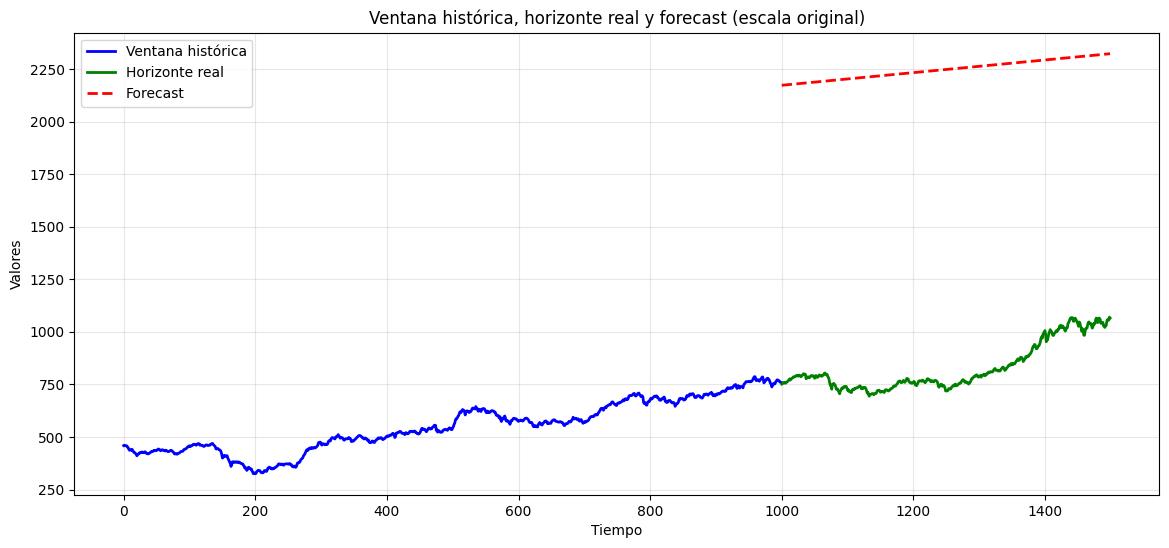

In [8]:
forecast_original, resultado = hacer_forecast(v1, h1, primer_valor, scaler, p, d, q, n_lags=7)